In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import folium
import matplotlib
from folium.plugins import HeatMap

In [2]:
mh = pd.read_csv('Melbourne_House_Clean.csv')

In [3]:
mh.drop('Unnamed: 0', axis=1, inplace =True)

In [4]:
mh['Date'] = mh['Date'].astype('datetime64[ns]')

In [5]:
mh.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h   938143.0     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u   878520.0     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  \
0 2016-03-09       2.5    3067.0       1.0  1.0     126.0          89.0   
1 2016-03-12       2.5    3067.0       1.0  1.0     202.0         205.0   
2 2016-04-02       2.5    3067.0       1.0  0.0     156.0          79.0   
3 2016-04-02       2.5    3067.0       2.0  1.0     447.0         120.0   
4 2017-04-03       2.5    3067.0       2.0  0.0     134.0         150.0   

          CouncilArea  Lattitude  Longtitude             Regionname  \
0  Yarra City Council   -37.8014    144.9958  Northern Metropolitan   
1  Yarra City Council   -37.7996    144.9984  Northern Metropolitan   
2  Yarra City Council   -37.8079    144.9934  Northern Metropolitan   
3  Yarra City Council   -37.8114    145.0116  Northern Metropolitan   
4  Yarra City Council   -37.8093    144.9944  Northern Metropolitan   

   Propertycount  
0         4019.0  
1         4019.0  
2         4019.0  
3         4019.0  
4         4019.0

In [6]:
mh.nunique()

Suburb             350
Address          34003
Rooms               11
Type                 3
Price             3376
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bathroom            11
Car                 15
Landsize          1685
BuildingArea       741
CouncilArea         33
Lattitude        13470
Longtitude       14625
Regionname           8
Propertycount      342
dtype: int64

In [7]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34851 entries, 0 to 34850
Data columns (total 19 columns):
Suburb           34851 non-null object
Address          34851 non-null object
Rooms            34851 non-null int64
Type             34851 non-null object
Price            34851 non-null float64
Method           34851 non-null object
SellerG          34851 non-null object
Date             34851 non-null datetime64[ns]
Distance         34851 non-null float64
Postcode         34851 non-null float64
Bathroom         34851 non-null float64
Car              34851 non-null float64
Landsize         34851 non-null float64
BuildingArea     34851 non-null float64
CouncilArea      34851 non-null object
Lattitude        34851 non-null float64
Longtitude       34851 non-null float64
Regionname       34851 non-null object
Propertycount    34851 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(1), object(7)
memory usage: 5.1+ MB


# Melbourne House Market Analysis (Data Visualization)

Data yang kami analisis merupakan data House Market di daerah Melbourne dimana kami menggunakan 34.851 data dengan total kolom sebanyak 19 kolom. Data sebelumnya sudah kami lakukan proses cleaning dengan menghilangkan beberapa data yang kosong atau mengisi data kosong dengan rata-rata yang didasarkan pada kondisi dari kolom lain yang memiliki hubungan erat dengan kolom pada data kosong tersebut.

Secara garis besar, area di Melbourne dibagi menjadi beberapa <b>region</b>. Tiap region kemudian dibagi lagi menjadi <b>council area</b> dan tiap council area dibagi menjadi <b>suburb</b>. 

Bila dirincikan, data yang kami gunakan berisi informasi mengenai <b>jumlah property (rumah) di area Melbourne, tipe rumah yang dijual, alamat rumah, harga, jumlah kamar/kamar mandi/carport pada masing-masing rumah yang dijual, luas tanah, luas bangunan, data lat-long, jarak rumah dengan CBD (Central Business District), hingga metode penjualan, tanggal terjaul, dan agen penjualnya.</b>



### Melbourne Property Count by Region Name

In [8]:
RegionName = mh['Regionname'].unique()
PropertyCount = []
for item in RegionName:
    propcount = sum(mh[mh['Regionname']==item]['Propertycount'].value_counts().index)
    PropertyCount.append(propcount)

newdict = {
    'RegionName': RegionName,
    'PropertyCount' : PropertyCount
}

reg_prop=pd.DataFrame(newdict).sort_values(by='PropertyCount',ascending=False)

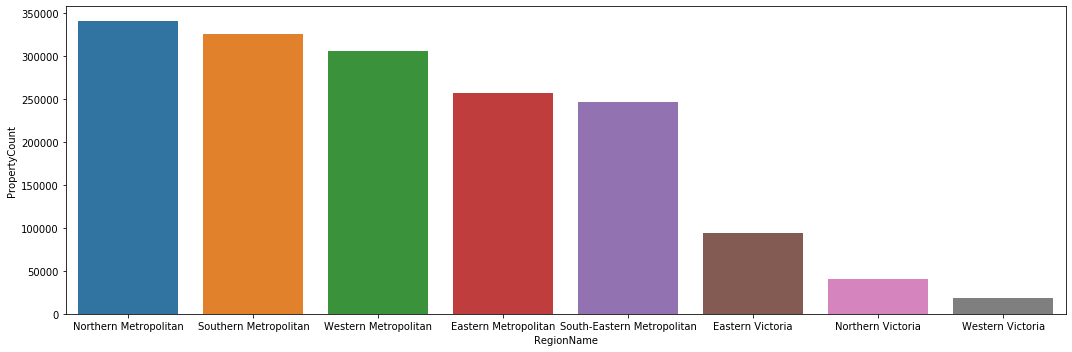

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(y=reg_prop['PropertyCount'],x=reg_prop['RegionName'])
plt.tight_layout()

Grafik di atas merupakan gambaran umum mengenai jumlah properti yang ada pada pasar jual beli rumah di Melbourne periode 2016-2018. Dari dataset yang kami gunakan, property terbanyak pada pasar jual-beli rumah di melbourne (2016-2018) ada pada Region <b>Northern Metropolitan'</b>, sementara yang paling sedikit ada pada <b>Western Victoria</b>

In [10]:
distance_region_mean = mh.groupby(['Regionname']).mean()[['Distance']].sort_values(by='Distance').apply(np.floor)

In [11]:
listLatLong = []
for index, value in mh.iterrows():
    temp = [value['Lattitude'], value['Longtitude']]
    listLatLong.append(temp)
    
map_1 = folium.Map(location=[-37.8136,144.9631],zoom_start=10,tiles='StamenTerrain',control_scale=True)
HeatMap(data=listLatLong, radius=10, oppacity=0.1).add_to(map_1)

folium.Marker([-37.8136,144.9631],
              popup='CBD Melbourne',
              icon=folium.Icon(color='red',icon='cloud')
              ).add_to(map_1)

for item in range (len(distance_region_mean)):
    folium.Circle([-37.8136,144.9631],
                  radius=list((distance_region_mean.values[item]+2)*1000),
                  tooltip=str(distance_region_mean.index[item]),
                 ).add_to(map_1)

map_1

Bila divisualisasikan berdasarkan radius rata-rata jarak dari masing-masing region ke CBD, <b> Northern Metropolitan dan Southern Metropolitan</b> merupakan region dengan jarak yang paling <b>dekat dengan CBD</b>. Sementara <b>Eastern, Northern, dan Western Victoria</b> merupakan region yang <b>paling jauh dari CBD</b>. 

Hal ini dapat menunjukan bahwa <b>jumlah properti yang diperjual-belikan di Melbourne cenderung lebih banyak di area yang dekat dengan CBD.</b>

### Top 10 Melbourne House by Suburb

Seperti yang telah disebutkan sebelumnya, selain dibagi menjadi region, daerah di Melbourne dibagi lebih spesifik menjadi suburb. Berikut merupakan <b>10 suburb dengan jumlah jual-beli rumah yang paling banyak di Melbourne.</b>

In [12]:
top_ten_suburb = mh['Suburb'].value_counts()[:10]
top_ten_suburb_index = top_ten_suburb.index

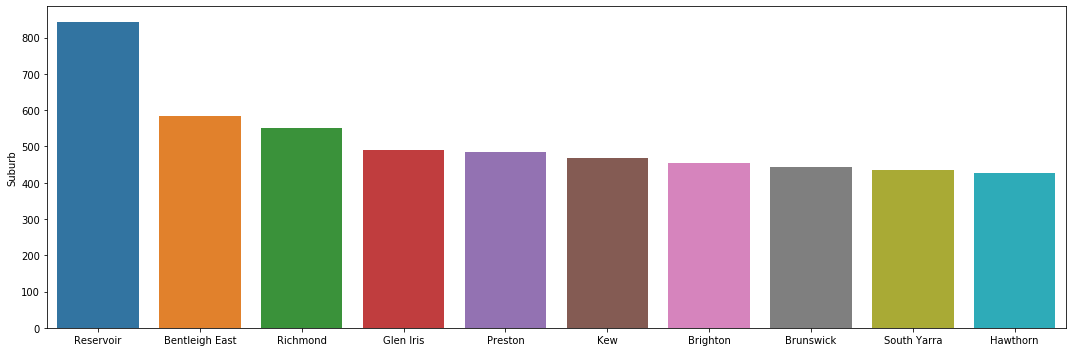

In [13]:
fig = plt.figure(figsize=(15,5))
sns.barplot(y=top_ten_suburb,x=top_ten_suburb_index)
plt.tight_layout()

Pada grafik di atas dapat kita lihat suburb dengan jumlah jual beli rumah paling banyak adalah <b> Reservoir </b>, kemudian dilanjutkan oleh <b>Bentleigh East, Richmond, Glen Iris, dan Preston</b> di urutan ke 2 hingga 4. 

Kita juga dapat melihat pada rekap tabel di bawah ini bahwa top 10 suburb dengan jumlah jual beli rumah terbanyak ada pada region Northern Metropolitan dan Southern Metropolitan, dimana kedua region terebut merupakan Top2 region dengan jumlah properti terbanyak di Melbourne.

In [14]:
top_ten_surbANDreg = []
for item in top_ten_suburb.index:
    reg = mh[mh['Suburb']==item]['Regionname'].values[0]
    top_ten_surbANDreg.append(reg)
newdict={
    'Suburb': top_ten_suburb.index,
    'Regionname': top_ten_surbANDreg
}

rekapTop10Suburb = pd.DataFrame(newdict)
rekapTop10Suburb

Suburb             Regionname
0       Reservoir  Northern Metropolitan
1  Bentleigh East  Southern Metropolitan
2        Richmond  Northern Metropolitan
3       Glen Iris  Southern Metropolitan
4         Preston  Northern Metropolitan
5             Kew  Southern Metropolitan
6        Brighton  Southern Metropolitan
7       Brunswick  Northern Metropolitan
8     South Yarra  Southern Metropolitan
9        Hawthorn  Southern Metropolitan

### Melbourne House Distribution by Type

Tipe rumah yang diperjual belikan di Melbourne dibagi menjadi 3 kategori. Adapun 3 jenis tipe rumah pada data yang kami gunakan, antara lain:
* h = house, cottage, villa, semi, terrace
* u = unit
* t = townhouse

Berikut merupakan visualisasi tipe-tipe rumah yang diperjual belikan di Melbourne dengan memetakan tipe-tipe tersebut berdasarkan longitude dan latitudenya:

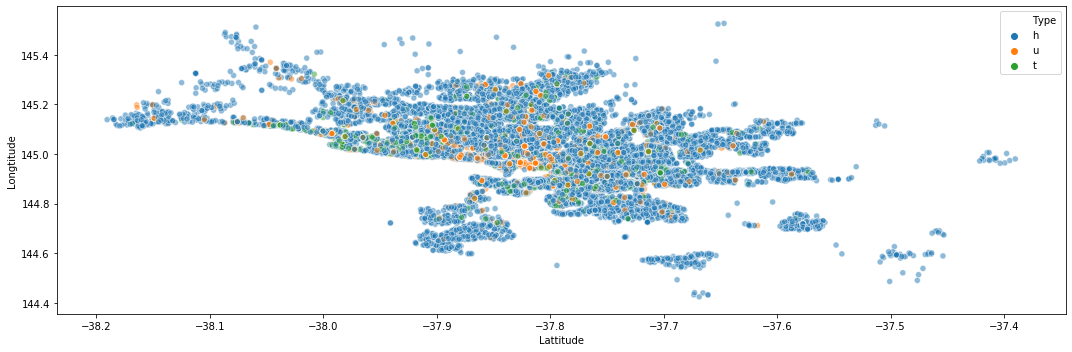

In [15]:
fig = plt.figure(figsize=(15,5))
sns.scatterplot(data=mh, x= 'Lattitude', y = 'Longtitude', hue = 'Type' , alpha = 0.5)
plt.tight_layout()

Secara garis besar, house property yang ada di Melbourne didominasi oleh tipe h. Untuk tipe u dan tipe t umumnya banyak terdapat pada daerah yang dekat dengan CBD. Untuk daerah dengan radius yang cukup jauh dari CBD, jumlah house property dengan tipe u dan tipe t tidak terlalu banyak.

In [16]:
mh.groupby('Type').mean()[['BuildingArea']]

BuildingArea
Type              
h       187.950107
t       150.852969
u        82.622888

Bila kita lihat dari segi luas bangunan di tabel atas, tipe u dan tipe t memiliki rata-rata luas bangunan yang lebih kecil dibandingkan tipe h. Padatnya jumlah house property di daerah yang dekat dengan CBD bisa menjadi salah satu aspek property u dan t mulai terlihat cukup banyak di daerah-daerah tersebut karena tipe house property u dan t umumnya memiliki luas bangunan yang lebih kecil.

### Highest Price of House

Berikut ini merupakan visualisasi harga-harga house property di Melbourne bila diklasifikasikan berdasarkan beberapa aspek kategorikal yang ada pada dataset kami. Adapun klasifikasi yang dilakukan yakni:
* Visualisasi harga dengan klasifikasi berdasarkan region
* Visualisasi harga dengan klasifikasi berdasarkan suburb
* Visualisasi harga dengan klasifikasi berdasarkan tipe rumah
* Visualisasi harga dengan klasifikasi berdasarkan jarak dengan CBD

In [17]:
# topTen_suburb_by_Price = 
group_suburb_by_price = round(mh.groupby(['Suburb']).mean()['Price']).sort_values(ascending=False)
topTen_suburb_by_price = group_suburb_by_price[:10]
topTen_suburb_by_price_index = topTen_suburb_by_price.index

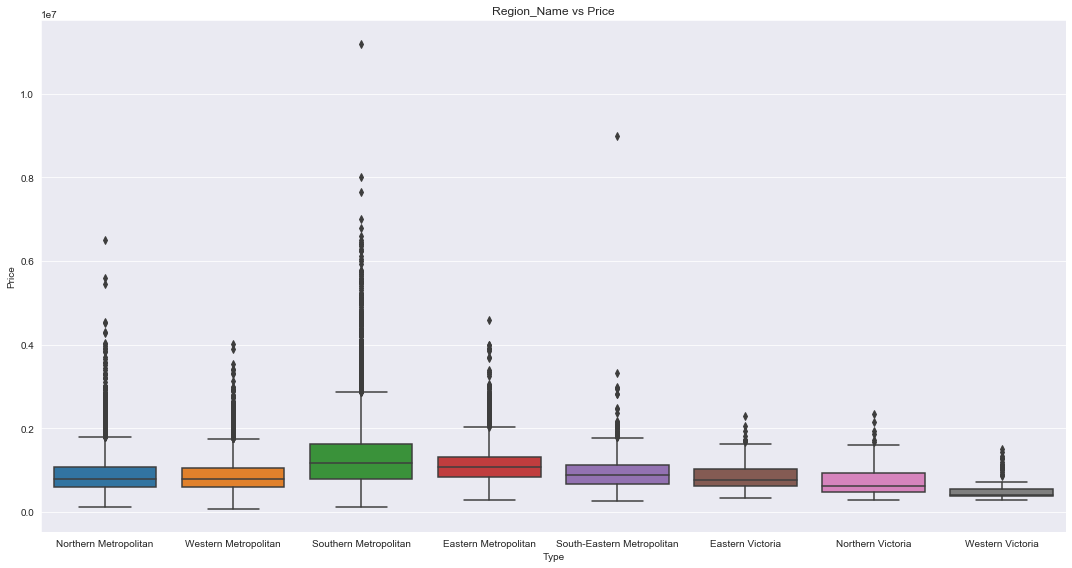

In [18]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(figsize =(15,8))

sns.boxplot(data =mh,x='Regionname',y='Price')
axes.set_xlabel('Type')
axes.set_ylabel('Price')
axes.set_title('Region_Name vs Price')
plt.tight_layout()

Grafik di atas merupakan gambaran visualisasi harga bila diklasifikasikan berdasarkan region name. Secara garis besar, rata-rata tiap region tidak terlalu berbeda jauh. Southern Metropolitan merupakan daerah dengan rentang harga paling tinggi dan rata-rata harga tertinggi. 

Visualisasi harga pada grafik di atas mengambil rata-rata semua property house di tiap region dan belum mempertimbangkan aspek lain seperti tipe house property dll, namun bila dilihat dari segi jarak ke CBD, region yang dekat dengan CBD memiliki rata-rata dan rentang harga yang lebih tinggi dibandingkan region lainnya.

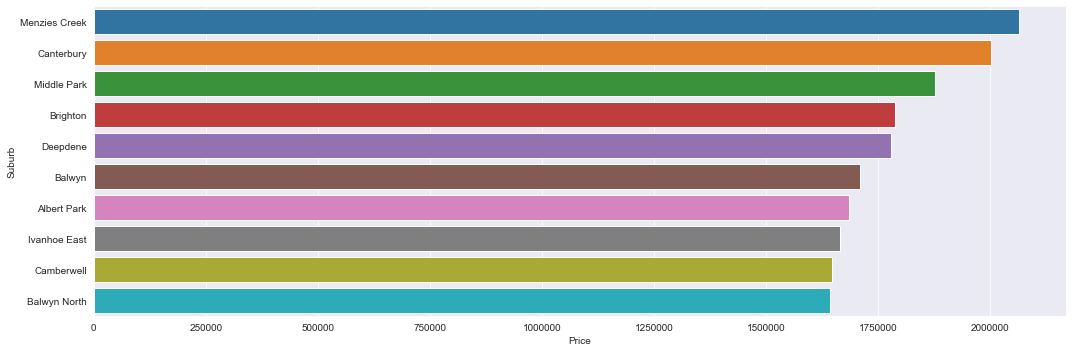

In [19]:
fig = plt.figure(figsize=(15,5))
sns.barplot(y=topTen_suburb_by_price_index,x=topTen_suburb_by_price)
plt.tight_layout()

Grafik di atas merupakan visualisasi harga bila diklasifikasikan berdasarkan suburb. Grafik di atas menampilkan 10 daerah dengan rata-rata harga house property termahal. 

Top 10 suburb dengan highest price tersebut merupakan suburb yang termasuk ke dalam region Northern dan Southern Metropolitan. Detail suburb dan region untuk daerah dengan harga house property tertinggi dapat dilihat pada tabel di bawah.

In [20]:
top_ten_surbANDreg2 = []
for item in topTen_suburb_by_price.index:
    reg = mh[mh['Suburb']==item]['Regionname'].values[0]
    top_ten_surbANDreg2.append(reg)
newdict={
    'Suburb': top_ten_suburb.index,
    'Regionname': top_ten_surbANDreg
}

rekapTop10Suburb2 = pd.DataFrame(newdict)
rekapTop10Suburb2

Suburb             Regionname
0       Reservoir  Northern Metropolitan
1  Bentleigh East  Southern Metropolitan
2        Richmond  Northern Metropolitan
3       Glen Iris  Southern Metropolitan
4         Preston  Northern Metropolitan
5             Kew  Southern Metropolitan
6        Brighton  Southern Metropolitan
7       Brunswick  Northern Metropolitan
8     South Yarra  Southern Metropolitan
9        Hawthorn  Southern Metropolitan

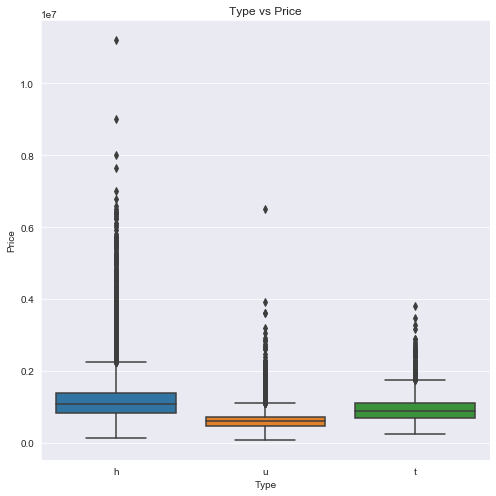

In [21]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(figsize =(7,7))

sns.boxplot(data =mh,x='Type',y='Price')
axes.set_xlabel('Type')
axes.set_ylabel('Price')
axes.set_title('Type vs Price')
plt.tight_layout()

Selanjutnya merupakan visualisasi harga house property di Melbourne bila diklasifikasikan berdasar tipe house property. Dapat dilihat bila tipe h merupakan tipe dengan rentang harga dan rata-rata-rata harga paling tinggi disusul dengan tipe t dan tipe u. 

In [22]:
fig = go.Figure(go.Densitymapbox(lat=mh.Lattitude, lon=mh.Longtitude, z=mh.Price, radius=5, opacity=0.6))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180,)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.add_trace(go.Scattermapbox(
        lat=[-37.8136],
        lon=[144.9631],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=['CBD Melbourne']
    ))
go.Densitymapbox()

fig.show()

Sementara visualisasi di atas merupakan visualisasi harga bila dilihat dari aspek jarak masing-masing house property ke CBD. Pada density heatmap tersebut dapat kita lihat bahwa semakin dekat dengan CBD maka semakin tinggi range harga property.

### House Feature related to Price 

Di bawah ini merupakan visualisasi harga bila dibandingkan dengan fitur-fitur yang ada pada tiap-tiap rumah. Fitur-fitur yang akan digunakan sebagai pembanding adalah fitur-fitur yang sudah ada pada dataset yang digunakan, adapun fitur-fitur tersebut antara lain:
* Rooms
* Bathroom
* Building Area
* Landsize
* Car Port
* Distance

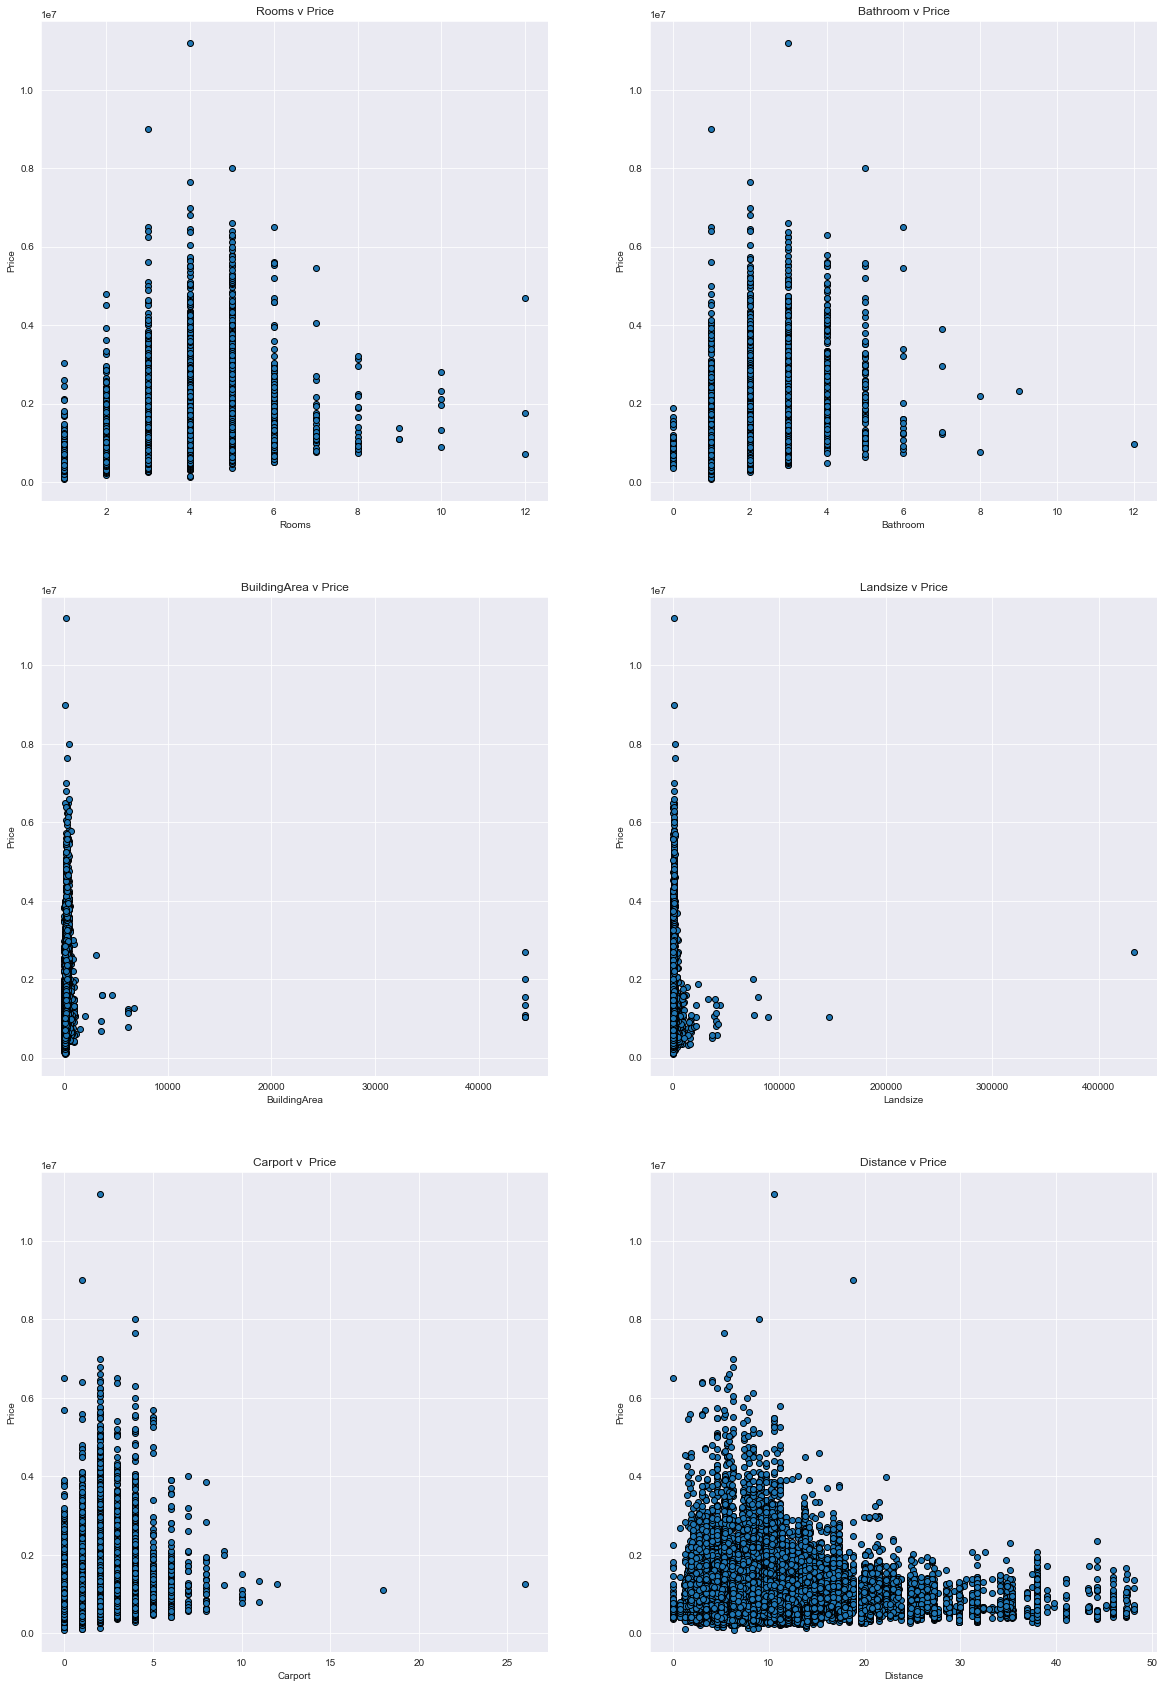

In [23]:
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = mh, edgecolor = 'black')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Bathroom', y = 'Price', data = mh, edgecolor = 'black')
axes[0,1].set_xlabel('Bathroom')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Bathroom v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'BuildingArea', y = 'Price', data = mh, edgecolor = 'black')
axes[1,0].set_xlabel('BuildingArea')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('BuildingArea v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Landsize', y = 'Price', data = mh, edgecolor = 'black')
axes[1,1].set_xlabel('Landsize')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Landsize v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Car', y = 'Price', data = mh, edgecolor = 'black')
axes[2,0].set_xlabel('Carport')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Carport v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'Distance', y = 'Price', data = mh, edgecolor = 'black')
axes[2,1].set_xlabel('Distance')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('Distance v Price')

plt.show()

## Corelation each Index on Melbourne House Market

Secara keseluruhan,hubungan korelasi tiap variabel terhadap variabel lain dapat digambarkan dengan heatmap yang berisikan index korelasi dari tiap-tiap variabel dengan range korelasi 0-1. Pada visualisasi korelasi di bawah ini, semakin besar index korelasi maka semakin erat pula hubungan antar variabelnya.

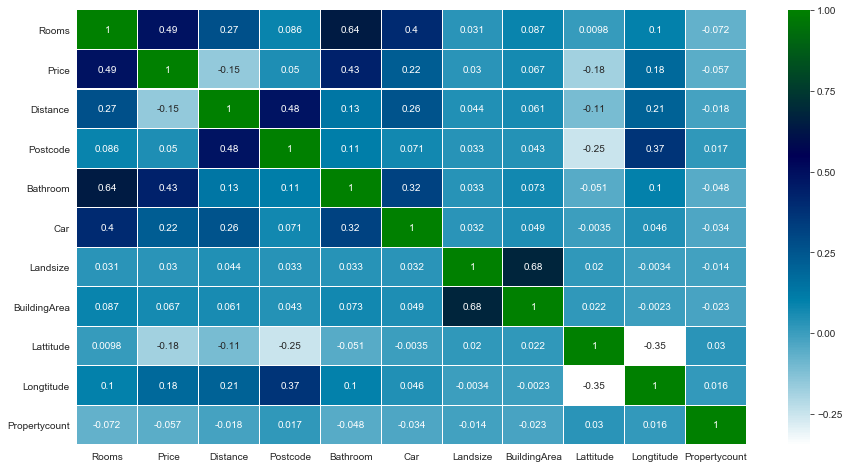

In [24]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(mh.corr(), cmap ='ocean_r', linewidth = 0.1, annot=True)

Dapat kita simpulkan bahwa untuk variabel harga, erat korelasinya dengan variabel-variabel lain seperti rooms, bathroom, ataupun carport. Selain itu variabel harga juga memiliki hubungan korelasi terbalik dengan variabel jarak, dimana hal tersebut berarti harga akan semakin bertambah bila jarak dekat dan akan semakin berkurang harga bila jarak jau.

## Trendline for House Market in Melbourne

Cara penjualan house property di Melbourne dibagi menjadi beberapa metode. Adapun metode penjualan yang digunakan pada Melbourne house market, antara lain:
* <b>S - property sold</b> 
(terjual tanpa melalui proses lelang)
* <b>SP - property sold prior</b> 
(terjual sebelum lelang karena ada offer pre-auction)
* <b>PI - property passed in</b> 
(ketika penjualan pada lelang tidak memenuhi batas bawah si pelelang, maka penawar tertinggi yang akan punya hak untuk negosiasi sebelum dilakukan penjualan)
* <b>PN - sold prior not disclosed</b>
(dijual sebelum lelang dan tanpa menunjukan defects atau keadaan aktual lainnya pada rumah yang mungkin dapat mempengaruhi keputusan calon pembeli. Bila calon pembeli ingin melakukan survey langsung, pembeli harus membuat ijin tertulis untuk membawa inspektor sebelum proses pembelian)
* <b>SN - sold not disclosed</b>
(dijual tanpa menunjukan defects atau keadaan aktual lainnya pada rumah yang mungkin dapat mempengaruhi keputusan calon pembeli. Bila calon pembeli ingin melakukan survey langsung, pembeli harus membuat ijin tertulis untuk membawa inspektor sebelum proses pembelian)
* <b>VB - vendor bid</b>
(vendor sendiri yang melakukan bidding)
* <b>W - withdrawn prior to auction</b>
(ditarik sebelum pelelangan)
* <b>SA - sold after auction</b>
(terjual setelah pelelangan)
* <b>SS - sold after auction price not disclosed</b>
(terjual setelah pelelangan dan harga tidak dibuka)

In [25]:
mh['Year'] = mh['Date'].dt.year

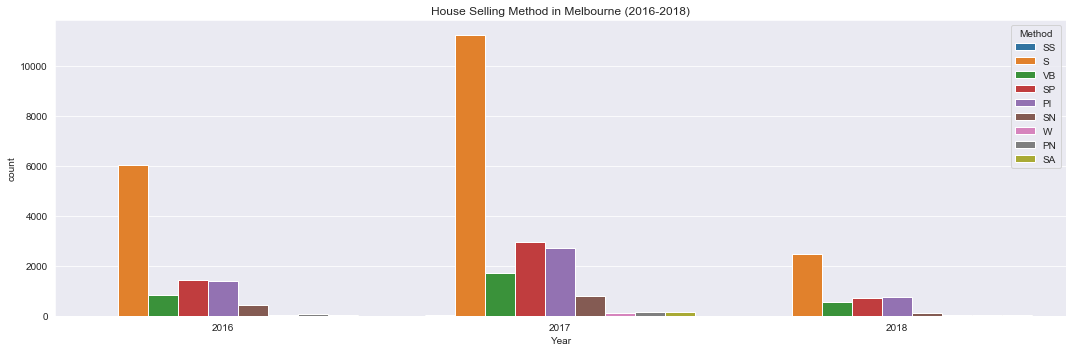

In [26]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x=mh.Year, hue=mh.Method)
plt.title('House Selling Method in Melbourne (2016-2018)')
plt.tight_layout()

Dari grafik di atas, dapat kita lihat bahwa di tiap tahun penjualan terbanyak menggunakan metode S (Terjual tidak menggunakan proses lelang). Jumlah penjualan terbanyak ada pada tahun 2017 dan penjualan menurun di tahun 2018. 
    
Bila kita lihat di tiap tahunnya, penjualan melalui proses lelang umumnya closed sebelum proses lelang dimulai (karena ada offer pre-auction) atau closed dengan keadaan bidding yang diajukan oleh penawar belum mencapai batas bawah lelang.

Selanjutnya di bawah ini merupakan trendline harga house property di Melbourne selama periode 2016-2018.

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



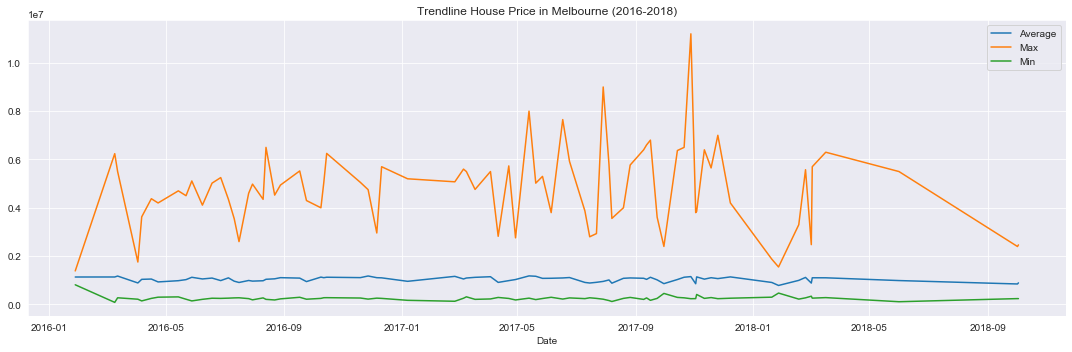

In [27]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(x=mh.groupby(['Date']).mean()['Price'].index,y=mh.groupby(['Date']).mean()['Price'].values, label='Average')
sns.lineplot(x=mh.groupby(['Date']).max()['Price'].index,y=mh.groupby(['Date']).max()['Price'].values, label='Max')
sns.lineplot(x=mh.groupby(['Date']).min()['Price'].index,y=mh.groupby(['Date']).min()['Price'].values, label='Min')
plt.title('Trendline House Price in Melbourne (2016-2018)')
plt.tight_layout()

Dilihat dari harga-harga jual rumah di Melbourne pada grafik di atas, kita dapat mengetahui bagaimana harga berfluktuasi dari waktu ke waktu dan apakah ada penurunan atau kenaikan harga yang signifikan. Berdasarkan plot tersebut, cukup jelas bahwa harga rumah di Melbourne umumnya relatif konstan dari segi rata-rata dan fluktuatif untuk harga tertingginya saja (2016-2019). 

Kesimpulan untuk trendline house market di Melbourne:
* Secara harga tidak terjadi perubahan yang signifikan tiap tahunnya. Rata-rata harga house property di Melbourne cenderung konstan
* Meskipun harga cenderung konstan, house market cenderung mengalami penurunan yang cukup signifikan dari segi jumlah penjualan. Di tahun 2018 jumlah house property yang terjual turun jauh dibandingkan tahun-tahun sebelumnya.